In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data prep

In [3]:
y = df['Outcome']
X = df.drop('Outcome',axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Hyperparameter optimisation

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,8+1),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(model,param_grid,cv=10,scoring='roc_auc')
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 8, 'min_samples_leaf': 15}

0.8058206669023212

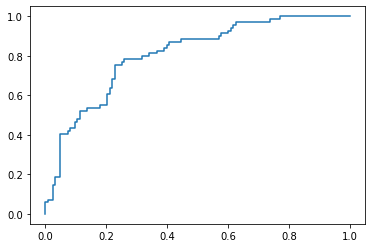

In [13]:
from sklearn.metrics import roc_curve,auc

probas = best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,probas[:,1])
plt.plot(fpr,tpr)
auc(fpr,tpr)

In [ ]:
probas

In [18]:
df.shape[0]

768

### Exploring a tree

In [15]:
first_tree = best_model.estimators_[1]
imps = first_tree.feature_importances_
imps

array([0.10017132, 0.39425502, 0.00200853, 0.        , 0.01044912,
       0.4342947 , 0.04108861, 0.0177327 ])

In [16]:
for i in range(100):
    first_tree = best_model.estimators_[i]
    imps = first_tree.feature_importances_
    for j in range(len(imps)):
        if imps[j]==0:
            print('missing var at {} position {}'.format(i,j))


missing var at 0 position 2
missing var at 1 position 3
missing var at 2 position 0
missing var at 2 position 7
missing var at 3 position 0
missing var at 5 position 2
missing var at 7 position 3
missing var at 13 position 0
missing var at 13 position 4
missing var at 15 position 2
missing var at 15 position 5
missing var at 16 position 4
missing var at 18 position 2
missing var at 19 position 2
missing var at 20 position 6
missing var at 21 position 2
missing var at 21 position 6
missing var at 26 position 7
missing var at 27 position 3
missing var at 28 position 7
missing var at 30 position 6
missing var at 31 position 0
missing var at 31 position 6
missing var at 33 position 0
missing var at 33 position 4
missing var at 34 position 3
missing var at 35 position 3
missing var at 36 position 0
missing var at 36 position 3
missing var at 37 position 0
missing var at 39 position 4
missing var at 39 position 7
missing var at 40 position 6
missing var at 42 position 0
missing var at 43 pos

### Sanity check

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(first_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
pd.DataFrame(opt_model.cv_results_)

### Importances

In [ ]:
list(best_model.feature_importances_)

In [ ]:
list(X.columns)

### Single model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
probas = model.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr, thrsh = roc_curve(y_test,probas[:,1])
auc(fpr,tpr)